# Simple Kelly Criterion

http://www.elem.com/~btilly/kelly-criterion/

https://www.investopedia.com/articles/trading/04/091504.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['RIVN', 'LCID', 'GM', 'F', 'HMC', 'TSLA']
start = '2021-12-01'
end = '2022-09-02'


# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  6 of 6 completed


,F,GM,HMC,LCID,RIVN,TSLA
Date,,,,,,
2021-12-01 00:00:00-05:00,19.160006,57.927746,27.730000,51.139999,115.690002,365.000000
2021-12-02 00:00:00-05:00,19.443787,60.881001,28.410000,48.410000,110.769997,361.533325
2021-12-03 00:00:00-05:00,18.729443,59.573986,28.219999,47.270000,104.669998,338.323334
2021-12-06 00:00:00-05:00,18.807726,59.703690,28.330000,44.860001,116.779999,336.336670
2021-12-07 00:00:00-05:00,19.531855,61.389839,28.889999,43.880001,116.180000,350.583344


In [3]:
df.tail()

,F,GM,HMC,LCID,RIVN,TSLA
Date,,,,,,
2022-08-26 00:00:00-04:00,15.41,39.140636,26.340000,16.24,32.110001,288.089996
2022-08-29 00:00:00-04:00,15.57,39.419998,26.799999,16.17,32.310001,284.820007
2022-08-30 00:00:00-04:00,15.45,39.130001,26.650000,15.15,31.889999,277.700012
2022-08-31 00:00:00-04:00,15.24,38.209999,26.520000,15.34,32.709999,275.609985
2022-09-01 00:00:00-04:00,15.19,38.560001,26.120001,15.38,31.950001,277.160004


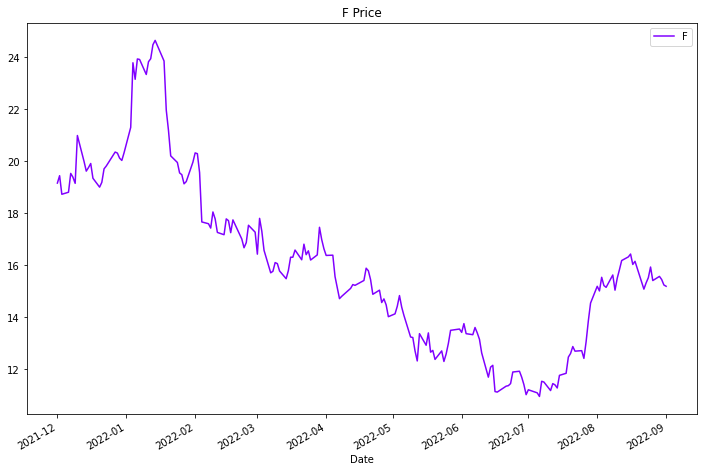

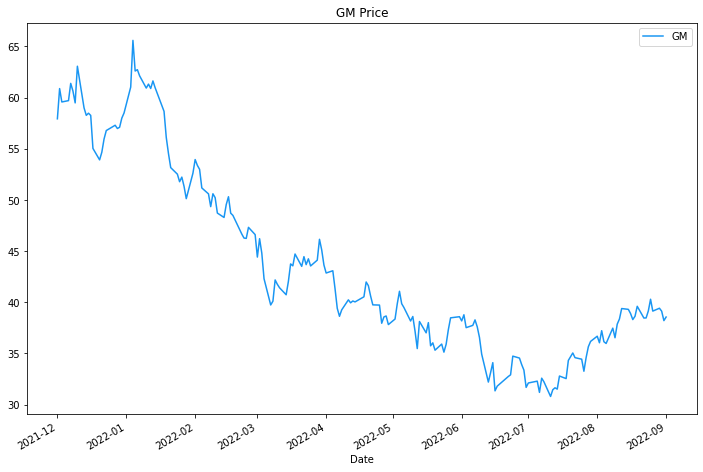

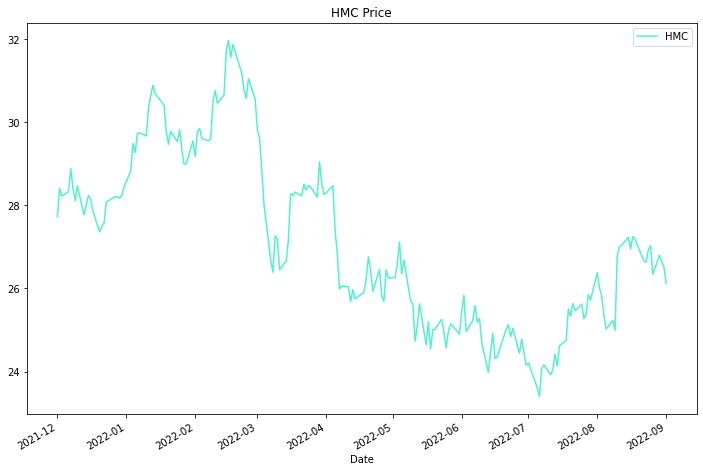

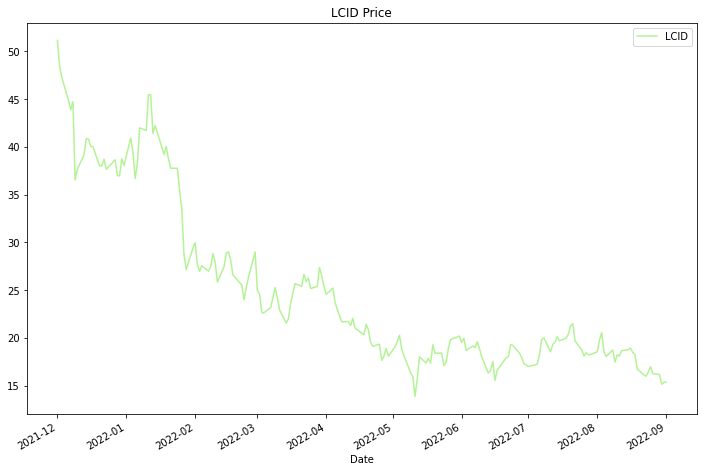

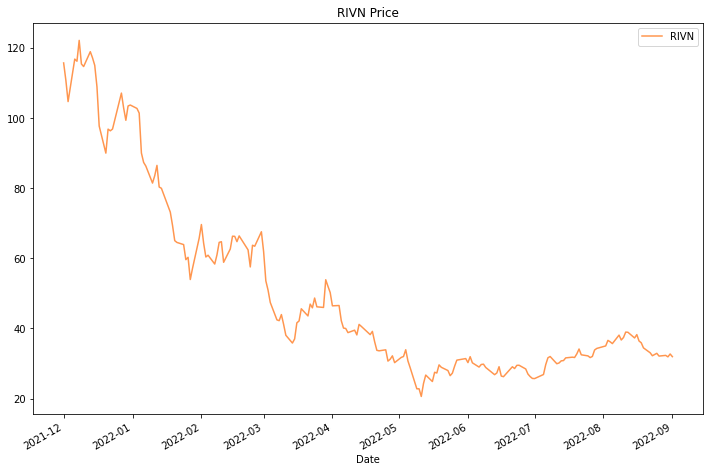

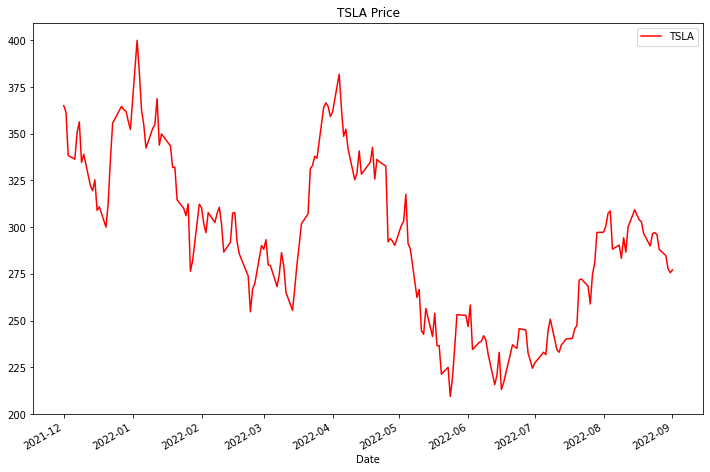

In [4]:
color = cm.rainbow(np.linspace(0, 1, len(symbols)))
for s, c in zip(df.columns, color):
    df[s].plot(figsize=(12,8), c=c)
    plt.title(s + " Price")
    plt.legend(loc='best')
    plt.show()

In [5]:
for s in df.columns:
    df[s + '_Returns'] = df[s].pct_change()

In [6]:
df = df.dropna()
df.head()

,F,GM,HMC,LCID,RIVN,TSLA,F_Returns,GM_Returns,HMC_Returns,LCID_Returns,RIVN_Returns,TSLA_Returns
Date,,,,,,,,,,,,
2021-12-02 00:00:00-05:00,19.443787,60.881001,28.410000,48.410000,110.769997,361.533325,0.014811,0.050982,0.024522,-0.053383,-0.042527,-0.009498
2021-12-03 00:00:00-05:00,18.729443,59.573986,28.219999,47.270000,104.669998,338.323334,-0.036739,-0.021468,-0.006688,-0.023549,-0.055069,-0.064199
2021-12-06 00:00:00-05:00,18.807726,59.703690,28.330000,44.860001,116.779999,336.336670,0.004180,0.002177,0.003898,-0.050984,0.115697,-0.005872
2021-12-07 00:00:00-05:00,19.531855,61.389839,28.889999,43.880001,116.180000,350.583344,0.038502,0.028242,0.019767,-0.021846,-0.005138,0.042358
2021-12-08 00:00:00-05:00,19.385071,60.641548,28.420000,44.720001,122.120003,356.320007,-0.007515,-0.012189,-0.016269,0.019143,0.051128,0.016363


In [7]:
# Kelly value negative means the expected returns will be negative
# Kelly value positive means the expected returns will be positive

for s, i in zip(df.columns[0:6],  df.columns[6:12]):
    returns = np.array(df[i])
    wins = returns[returns > 0]
    losses = returns[returns <= 0]
    # W = Winning probability
    # R = Win/loss ratio
    W = len(wins) / len(returns)
    R = np.mean(wins) / np.abs(np.mean(losses))
    Kelly = W - ( (1 - W) / R )
    print('Kelly Criterion for {} is {}%'.format(s, np.round(Kelly, 3)))

Kelly Criterion for F is -0.029%
Kelly Criterion for GM is -0.076%
Kelly Criterion for HMC is -0.013%
Kelly Criterion for LCID is -0.126%
Kelly Criterion for RIVN is -0.112%
Kelly Criterion for TSLA is -0.018%
